In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import integrate

In [9]:
def numerov(f, psi0, dh):

    psi = np.zeros(len(f))
    psi[0] = (1/(np.pi)**0.5)*np.exp(-R[-1])
    psi[1] = (1/(np.pi)**0.5)*np.exp(-(R[-1]-dh))
    
    h2 = dh**2
    h12 = h2/12.

    w0=psi0*(1-h12*f[0])
    w1=psi[1]*(1-h12*f[1])
    xi = psi[1]
    fi = f[1]
    for i in range(2,len(f)):
        w2 = 2*w1-w0+h2*fi*xi  
        fi = f[i] 
        xi = w2/(1-h12*fi)
        psi[i]=xi
        w0 = w1
        w1 = w2
    return psi

In [10]:
def fhyd(En, l, R):
    return l*(l+1)/(R**2)-2/R-En

In [11]:
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)

1.0182783528740948e-35 1.018359818482274e-35
1.0182783528740948e-35 1.018359818482274e-35
1.0182783528740948e-35 1.018359818482274e-35


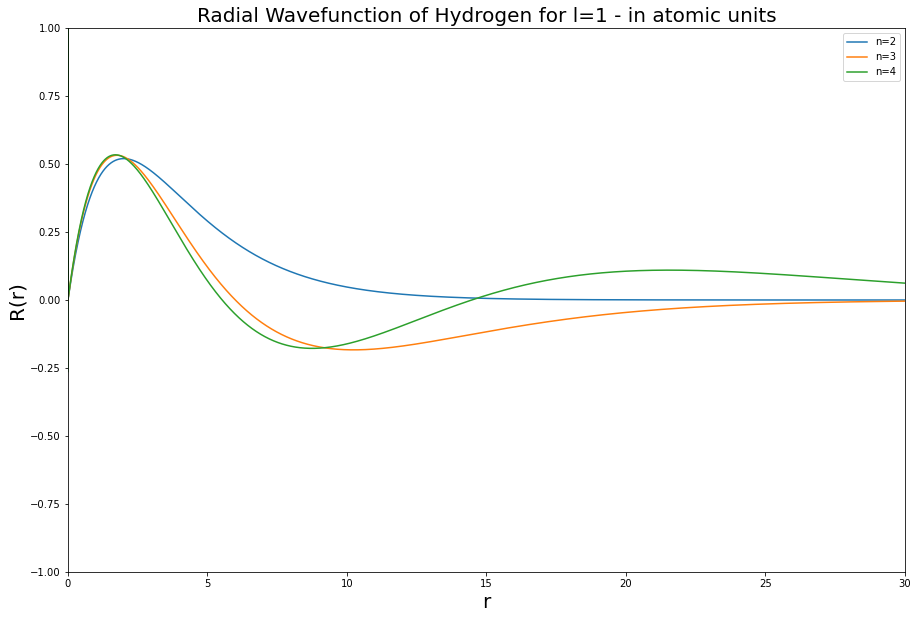

In [12]:

R = np.linspace(1e-7, 80, 10**6)
l=1

fig = plt.figure(figsize=(15,10))
for n in range(2, 5):
    En=-1.0/(n**2)
    f = fhyd(En,l,R[::-1])
    psi = numerov(f,0,R[1]-R[0])[::-1]
    psi = (-1)**(n+1)*(-1)**(l)*psi/R
    norm = integrate.trapezoid(psi**2,x=R)
    psi = psi/np.sqrt(abs(norm))

    plt.plot(R, psi, label=f"n={n}")
    plt.xlabel("r")
    plt.xlim(0,30)
    plt.ylim(-1,1)
    plt.ylabel("R(r)")
plt.title(f"Radial Wavefunction of Hydrogen for l={l} - in atomic units")
plt.legend()
plt.show()